Do some analysis on FPL players

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load teams and player data
players_data = pd.read_csv('players.csv')
teams_data = pd.read_csv('teams.csv')

# Load GW1 players data
gw1_data = pd.read_csv('data/GW1.csv')
print('No. of players in gameweek 1:', len(gw1_data))

pos_type = {1:'GK', 2:'DEF', 3:'MID', 4:'FWD'}
teams_id = dict(list(zip(teams_data['id'], teams_data['short_name'])))

No. of players in gameweek 1: 573


In [4]:
# Get players with at least 1 minute played
gw1_data_played = gw1_data[gw1_data['minutes'] > 0]
print('No. of players with more than 0 minutes played:', len(gw1_data_played))

No. of players with more than 0 minutes played: 297


In [5]:
# Plot histogram 
def plot_hist(axs, bins, data, xlabel=None, ylabel=None,
              ec='k', fc='lightsteelblue'):
    
    axs.hist(data, bins=bins, histtype='stepfilled', ec=ec,
             fc=fc)
    axs.set_xlim(bins.min(), bins.max())
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    
# Split table by position
def split_by_position(data):
    
    gk_data = data[data['element_type']==1]
    def_data = data[data['element_type']==2]
    mid_data = data[data['element_type']==3]
    fwd_data = data[data['element_type']==4]
    
    return gk_data, def_data, mid_data, fwd_data

# Get the mean, 25th percentile, and maximum points
def points_stats_summary(data):
    
    median = np.median(data)
    upper_quartile = np.percentile(data, 90)
    max_val = np.max(data)
    
    return median, upper_quartile, max_val

# Get top point earning players
def top_points_players(data, n_players):
    
    data = data.sort_values(by='total_points', ascending=False)
    
    return data[:n_players]

# Print top players summary
def top_players_summary(df, fpl_players):
    
    # Get max points scored
    max_points = df['total_points'].max()
    
    top_players = df[df['total_points']==max_points].reset_index(drop=True)
    
    if len(top_players) == 1:
        player_name = df.iloc[0]['web_name']
        team =  teams_id[df.iloc[0]['team']]
        points = df.iloc[0]['total_points']
        value = df.iloc[0]['value']/10
        owned = df.iloc[0]['selected'] * 100 / fpl_players
        position = df.iloc[0]['element_type']

        print('Top {}: {} ({}), Points: {}, Value: £{}M, selected by: {:.1f}%'.format(
            pos_type[position], player_name, team, points, value, owned))
    elif len(top_players) > 1:
        for i, row in top_players.iterrows():
            player_name = row['web_name']
            team =  teams_id[row['team']]
            points = row['total_points']
            value = row['value']/10
            owned = row['selected'] * 100 / fpl_players
            position = row['element_type']

            print('Top {} ({}/{}): {} ({}), Points: {}, Value: £{}M, selected by: {:.1f}%'.format(
                pos_type[position], i+1, len(top_players), player_name, team, points, value, owned))

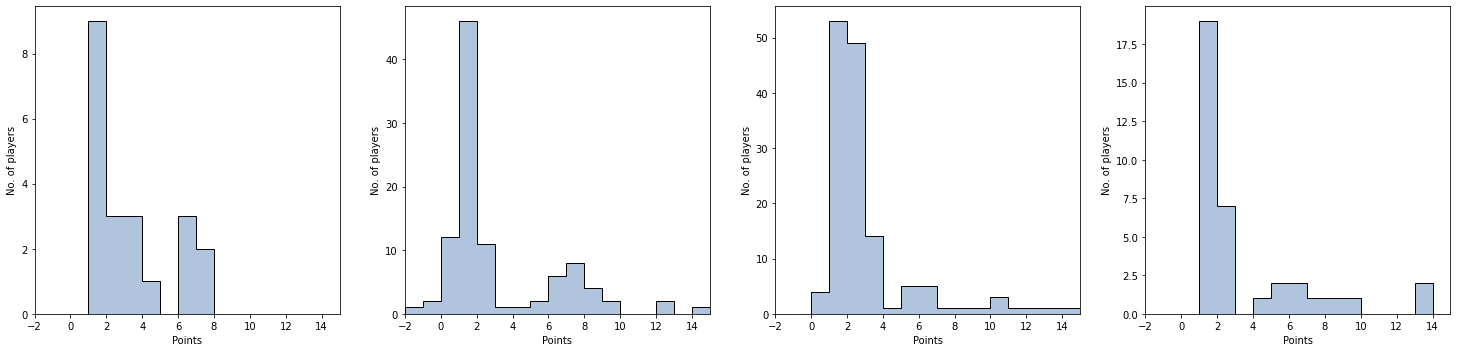

GK points  - Median:2.0, 90th percentile:6.0, Max:7
DEF points - Median:1.0, 90th percentile:7.0, Max:15
MID points - Median:2.0, 90th percentile:6.0, Max:15
FWD points - Median:1.0, 90th percentile:7.5, Max:13


In [6]:
# Plot total points histogram
gw1_total_points = gw1_data_played['total_points'].values
total_points_bins = np.arange(gw1_total_points.min(), gw1_total_points.max()+1)

xlabel = 'Points'
ylabel = 'No. of players'
fig, axs = plt.subplots(1, 4, figsize=(20.5, 5))

#plot_hist(axs[0], bins=total_points_bins, data=gw1_total_points,
#          xlabel=xlabel, ylabel=ylabel)

# Plot total points histogram for each position
gw1_gk = gw1_data_played[gw1_data_played['element_type']==1]
gk_bins = np.arange(gw1_gk['total_points'].min(), gw1_gk['total_points'].max()+1)
plot_hist(axs[0], bins=total_points_bins, data=gw1_gk['total_points'], xlabel=xlabel, ylabel=ylabel)

gw1_def = gw1_data_played[gw1_data_played['element_type']==2]
def_bins = np.arange(gw1_def['total_points'].min(), gw1_def['total_points'].max()+1)
plot_hist(axs[1], bins=total_points_bins, data=gw1_def['total_points'], xlabel=xlabel, ylabel=ylabel)

gw1_mid = gw1_data_played[gw1_data_played['element_type']==3]
mid_bins = np.arange(gw1_mid['total_points'].min(), gw1_mid['total_points'].max()+1)
plot_hist(axs[2], bins=total_points_bins, data=gw1_mid['total_points'], xlabel=xlabel, ylabel=ylabel)

gw1_fwd = gw1_data_played[gw1_data_played['element_type']==4]
fwd_bins = np.arange(gw1_fwd['total_points'].min(), gw1_fwd['total_points'].max()+1)
plot_hist(axs[3], bins=total_points_bins, data=gw1_fwd['total_points'], xlabel=xlabel, ylabel=ylabel)

plt.tight_layout()
plt.show()

gk_median, gk_uq, gk_max = points_stats_summary(gw1_gk['total_points'])
def_median, def_uq, def_max = points_stats_summary(gw1_def['total_points'])
mid_median, mid_uq, mid_max = points_stats_summary(gw1_mid['total_points'])
fwd_median, fwd_uq, fwd_max = points_stats_summary(gw1_fwd['total_points'])

print('GK points  - Median:{}, 90th percentile:{}, Max:{}'.format(gk_median, gk_uq, gk_max))
print('DEF points - Median:{}, 90th percentile:{}, Max:{}'.format(def_median, def_uq, def_max))
print('MID points - Median:{}, 90th percentile:{}, Max:{}'.format(mid_median, mid_uq, mid_max))
print('FWD points - Median:{}, 90th percentile:{}, Max:{}'.format(fwd_median, fwd_uq, fwd_max))

In [7]:
# Split data into positions
gw1_gk, gw1_def, gw1_mid, gw1_fwd = split_by_position(gw1_data)
gw1_pos = [gw1_gk, gw1_def, gw1_mid, gw1_fwd]
top_pos = [top_points_players(df, 10) for df in gw1_pos]

# Need to account for tied top point earners
print('='*32 + ' GAMEWEEK 01 ' + '='*32)
for df in top_pos:
    top_players_summary(df, 9.3e6)

================================ GAMEWEEK 01 ================================
Top GK (1/2): Ederson (MCI), Points: 7, Value: £5.5M, selected by: 13.3%
Top GK (2/2): Mendy (CHE), Points: 7, Value: £5.0M, selected by: 17.2%
Top DEF: Schär (NEW), Points: 15, Value: £4.5M, selected by: 0.4%
Top MID: Groß (BHA), Points: 15, Value: £5.5M, selected by: 0.1%
Top FWD (1/2): Mitrović (FUL), Points: 13, Value: £6.5M, selected by: 5.5%
Top FWD (2/2): Haaland (MCI), Points: 13, Value: £11.5M, selected by: 36.5%


In [8]:
# Do the same as above
gw2_data = pd.read_csv('data/GW2.csv')
gw2_pos = split_by_position(gw2_data)
top_pos = [top_points_players(df, 10) for df in gw2_pos]

print('='*32 + ' GAMEWEEK 02 ' + '='*32)
for df in top_pos:
    top_players_summary(df, 9.4e6)

================================ GAMEWEEK 02 ================================
Top GK: Sá (WOL), Points: 15, Value: £5.0M, selected by: 3.4%
Top DEF: Mee (BRE), Points: 14, Value: £4.5M, selected by: 0.3%
Top MID: Rodrigo (LEE), Points: 15, Value: £6.0M, selected by: 1.7%
Top FWD: Jesus (ARS), Points: 19, Value: £8.0M, selected by: 66.1%


In [9]:
# Do the same as above
gw3_data = pd.read_csv('data/GW3.csv')
gw3_pos = split_by_position(gw3_data)
top_pos = [top_points_players(df, 10) for df in gw3_pos]

print('='*32 + ' GAMEWEEK 03 ' + '='*32)
for df in top_pos:
    top_players_summary(df, 9.5e6)

================================ GAMEWEEK 03 ================================
Top GK: Martínez (AVL), Points: 10, Value: £5.0M, selected by: 5.1%
Top DEF: Saliba (ARS), Points: 14, Value: £4.5M, selected by: 5.5%
Top MID: Ødegaard (ARS), Points: 16, Value: £6.4M, selected by: 10.8%
Top FWD: Adams (SOU), Points: 12, Value: £6.4M, selected by: 0.5%


In [10]:
# Do the same as above
gw4_data = pd.read_csv('data/GW4.csv')
gw4_pos = split_by_position(gw4_data)
top_pos = [top_points_players(df, 10) for df in gw4_pos]

print('='*32 + ' GAMEWEEK 04 ' + '='*32)
for df in top_pos:
    top_players_summary(df, 9.7e6)

================================ GAMEWEEK 04 ================================
Top GK: Henderson (NFO), Points: 9, Value: £4.6M, selected by: 9.7%
Top DEF: Alexander-Arnold (LIV), Points: 17, Value: £7.5M, selected by: 46.5%
Top MID: Sterling (CHE), Points: 15, Value: £9.9M, selected by: 4.9%
Top FWD: Firmino (LIV), Points: 22, Value: £8.0M, selected by: 1.4%


In [14]:
# Merge gameweek tables
to_merge = [gw1_data, gw2_data, gw3_data, gw4_data]
gw_merged = pd.concat(to_merge).reset_index(drop=True)

In [15]:
gw_merged

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out,team,web_name,element_type
0,1,1,7,0,False,2022-08-05T19:00:00Z,0,2,1,0,...,0.0,0.0,45,0,23970,0,0,1,Cédric,2
1,2,4,12,0,True,2022-08-06T11:30:00Z,2,2,1,0,...,0.0,0.0,45,0,116351,0,0,9,Leno,1
2,3,1,7,2,False,2022-08-05T19:00:00Z,0,2,1,90,...,2.0,3.4,50,0,48303,0,0,1,Xhaka,3
3,4,1,7,0,False,2022-08-05T19:00:00Z,0,2,1,0,...,0.0,0.0,45,0,86132,0,0,1,Elneny,3
4,5,1,7,0,False,2022-08-05T19:00:00Z,0,2,1,0,...,0.0,0.0,45,0,14331,0,0,1,Holding,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,597,36,12,0,False,2022-08-27T14:00:00Z,9,0,4,0,...,0.0,0.0,45,0,0,0,0,3,Saydee,4
2343,598,36,12,1,False,2022-08-27T14:00:00Z,9,0,4,8,...,0.0,0.0,40,0,0,0,0,3,Bevan,2
2344,599,37,7,0,True,2022-08-27T14:00:00Z,4,2,4,0,...,0.0,0.0,45,0,0,0,0,13,Gomes,3
2345,600,37,7,0,True,2022-08-27T14:00:00Z,4,2,4,0,...,0.0,0.0,45,0,0,0,0,13,Knight,3


In [19]:
list(gw_merged)

['element',
 'fixture',
 'opponent_team',
 'total_points',
 'was_home',
 'kickoff_time',
 'team_h_score',
 'team_a_score',
 'round',
 'minutes',
 'goals_scored',
 'assists',
 'clean_sheets',
 'goals_conceded',
 'own_goals',
 'penalties_saved',
 'penalties_missed',
 'yellow_cards',
 'red_cards',
 'saves',
 'bonus',
 'bps',
 'influence',
 'creativity',
 'threat',
 'ict_index',
 'value',
 'transfers_balance',
 'selected',
 'transfers_in',
 'transfers_out',
 'team',
 'web_name',
 'element_type']

In [45]:
# Get list of unique players in merged gameweek table
merged_unique_players = gw_merged['element'].unique()

# Get cumulative stats
merged_stats = []
for i, player in enumerate(merged_unique_players):
    
    print('{}/{} ({:.1f}%)'.format(i+1, len(merged_unique_players),
                                   (i+1)*100/len(merged_unique_players)), end='\r')
    
    gw_data = gw_merged[gw_merged['element']==player]
    
    # Get total stats
    name = gw_data['web_name'].unique()[0]
    points = gw_data['total_points'].sum()
    minutes = gw_data['minutes'].sum()
    goals = gw_data['goals_scored'].sum()
    assists = gw_data['assists'].sum()
    clean_sheets = gw_data['clean_sheets'].sum()
    conceded = gw_data['goals_conceded'].sum()
    bonus = gw_data['bonus'].sum()
    avg_value = np.round(np.mean(gw_data['value'])/10, 1)
    team = gw_data['team'].unique()[0]
    pos = gw_data['element_type'].unique()[0]
    
    total_data = {
        'name':name,
        'total_points':points,
        'minutes':minutes,
        'goals_scored':goals,
        'assists':assists,
        'clean_sheets':clean_sheets,
        'goals_condeded':conceded,
        'bonus':bonus,
        'average_value':avg_value,
        'team':teams_id[team],
        'element_type':pos
    }
    
    merged_stats.append(total_data)

In [46]:
merged_gw_df = pd.DataFrame(merged_stats)

In [47]:
merged_gw_df.sort_values(by='total_points', ascending=False)[:20]

,name,total_points,minutes,goals_scored,assists,clean_sheets,goals_condeded,bonus,average_value,team,element_type
317,Haaland,41,323,6,1,2,5,6,11.6,MCI,4
224,Rodrigo,37,326,4,1,1,4,5,6.2,LEE,3
103,Groß,35,360,3,1,3,1,6,5.6,BHA,3
6,Ødegaard,31,343,3,0,2,3,6,6.5,ARS,3
397,Henderson,30,360,0,0,1,5,5,4.5,NFO,1
25,Saliba,28,360,1,1,2,3,6,4.5,ARS,2
300,De Bruyne,27,355,1,3,2,5,3,12.1,MCI,3
292,Luis Díaz,27,347,3,0,1,5,4,8.0,LIV,3
367,Saint-Maximin,27,343,1,3,2,4,4,6.5,NEW,3
79,Toney,27,360,2,2,1,6,5,7.1,BRE,4


,name,total_points,minutes,goals_scored,assists,clean_sheets,goals_condeded,bonus,average_value,team,element_type
0,Henderson,30,360,0,0,1,5,5,4.5,NFO,1
1,Sánchez,26,360,0,0,3,1,4,4.5,BHA,1
2,Sá,23,360,0,0,1,4,3,5.0,WOL,1
3,Pope,22,360,0,0,2,4,3,5.0,NEW,1
4,Lloris,18,360,0,0,2,3,2,5.5,TOT,1
5,Raya,18,360,0,0,1,6,2,4.5,BRE,1
6,Martínez,16,360,0,0,0,7,2,5.0,AVL,1
7,Ederson,15,360,0,0,2,5,1,5.5,MCI,1
8,Ramsdale,15,360,0,0,2,3,0,5.0,ARS,1
9,Meslier,14,360,0,0,1,4,0,4.5,LEE,1


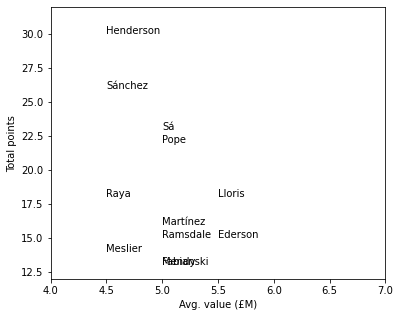

,name,total_points,minutes,goals_scored,assists,clean_sheets,goals_condeded,bonus,average_value,team,element_type
0,Saliba,28,360,1,1,2,3,6,4.5,ARS,2
1,Veltman,24,339,0,0,3,1,4,4.5,BHA,2
2,Gabriel,24,360,1,0,2,3,3,5.0,ARS,2
3,Perišić,23,183,0,2,2,0,3,5.5,TOT,2
4,Trippier,22,360,1,0,2,4,2,5.0,NEW,2
5,Emerson Royal,22,347,0,2,2,3,1,5.0,TOT,2
6,James,22,360,1,1,1,6,5,6.0,CHE,2
7,Dunk,22,360,0,0,3,1,2,4.5,BHA,2
8,Schär,21,360,1,0,2,4,3,4.6,NEW,2
9,Dier,21,360,1,0,2,3,0,5.0,TOT,2


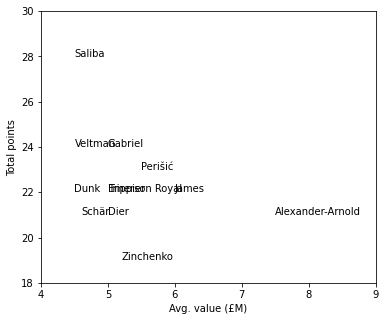

,name,total_points,minutes,goals_scored,assists,clean_sheets,goals_condeded,bonus,average_value,team,element_type
0,Rodrigo,37,326,4,1,1,4,5,6.2,LEE,3
1,Groß,35,360,3,1,3,1,6,5.6,BHA,3
2,Ødegaard,31,343,3,0,2,3,6,6.5,ARS,3
3,Saint-Maximin,27,343,1,3,2,4,4,6.5,NEW,3
4,Luis Díaz,27,347,3,0,1,5,4,8.0,LIV,3
5,De Bruyne,27,355,1,3,2,5,3,12.1,MCI,3
6,Harrison,26,328,1,3,1,4,5,6.0,LEE,3
7,Salah,25,360,2,1,1,5,3,13.0,LIV,3
8,Gündogan,25,260,2,1,2,3,3,7.5,MCI,3
9,Kulusevski,24,342,1,2,2,3,3,8.1,TOT,3


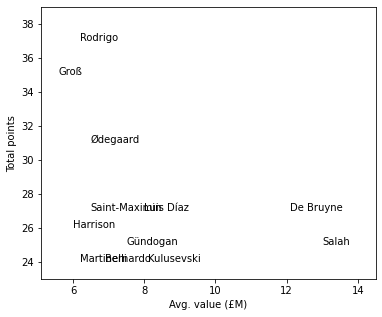

,name,total_points,minutes,goals_scored,assists,clean_sheets,goals_condeded,bonus,average_value,team,element_type
0,Haaland,41,323,6,1,2,5,6,11.6,MCI,4
1,Toney,27,360,2,2,1,6,5,7.1,BRE,4
2,Jesus,26,343,2,3,2,3,3,8.1,ARS,4
3,Kane,26,360,4,0,2,3,6,11.4,TOT,4
4,Firmino,25,208,2,3,1,3,3,8.0,LIV,4
5,Mitrović,25,360,4,0,1,6,4,6.6,FUL,4
6,Watkins,20,294,1,2,0,6,3,7.4,AVL,4
7,Welbeck,16,357,0,2,3,1,2,6.5,BHA,4
8,Adams,16,211,2,0,0,3,3,6.4,SOU,4
9,Vardy,14,313,0,2,1,7,0,9.5,LEI,4


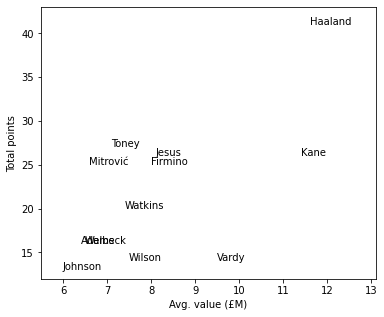

In [94]:
gw_merged_pos = split_by_position(merged_gw_df)
top_merged_pos = [top_points_players(df, 12) for df in gw_merged_pos]

for df in top_merged_pos:
    display(df.reset_index(drop=True))
    
    #print(df['average_value'].values)
    #print(df['total_points'].values)
    #print(df['name'].values)
    
    #plt.scatter(df['average_value'].values, df['total_points'].values)
    plt.figure(figsize=(6,5))
    plt.xlim(df['average_value'].min()-0.5, df['average_value'].max()+1.5)
    plt.ylim(df['total_points'].min()-1, df['total_points'].max()+2)
    for i, row in df.iterrows():
        plt.text(x=row['average_value'], y=row['total_points'], s=row['name'])
    
    plt.xlabel('Avg. value (£M)')
    plt.ylabel('Total points')
    plt.show()